In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import glob
from shutil import copyfile
import os

for f in glob.glob('./cache/translations/*/*/translations.csv'):
    target_path = f.replace('cache', 'data').rstrip('translations.csv')
    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    copyfile(f, f.replace('cache', 'data'))

In [2]:
import statistics
import math
import matplotlib.pyplot as plt
from unidecode import unidecode
from collections import Counter
import numpy as np


def binary_ci(success, total, alpha=0.95):
    """
    Using Agresti-Coull interval
    
    Return mean and confidence interval (lower and upper bound)
    """
    z = statistics.NormalDist().inv_cdf((1 + alpha) / 2)
    total = total + z**2
    loc = (success + (z**2) / 2) / total
    diameter = z * math.sqrt(loc * (1 - loc) / total)
    return loc, loc - diameter, loc + diameter 


def set_size(w,h, ax=None):
    """
    Used to size the figures with subplots
    
    https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units
    """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)


In [3]:
sentences = []
stereotypes = []

for line in open('./data/samples.txt'):
    words = line.split()
    sentences.append(' '.join(words[:-1]))
    stereotypes.append(int(words[-1]))

stereo_names = """
Emotional
Gentle
Empathetic
Neat
Social
Weak
Beautiful
Tough and rough
Self-confident
Professional
Rational
Providers
Leaders
Childish
Sexual
Strong
""".strip().split('\n')

In [4]:
"""
Retrieving unsaved translations from logs
"""

# import os
# google_translate = GoogleTranslate(
#     data_path='./cache/translations/google_translate',
#     target_language=target_language,
#     enable_api=False
# ).load()

# for i in range(1, 201):
#     fdir = '/labs/cache/translations/google_translate/cs/logs'
#     fin, fout = os.path.join(fdir, f'{i}.from'), os.path.join(fdir, f'{i}.to')
#     from_, to_ = open(fin).read(), open(fout).read()
#     if from_ not in google_translate.dataframe.index:
#         google_translate.dataframe.loc[from_] = to_

# google_translate.save()

'\nRetrieving unsaved translations from logs\n'

In [5]:
from translators.google_translate import GoogleTranslate
from translators.amazon_translate import AmazonTranslate
from translators.deepl import DeepL
from translators.nllb import NLLB

supported_languages = {
    DeepL: ['cs', 'pl', 'ru', 'sl', 'sk', 'uk'],
    AmazonTranslate: ['cs', 'pl', 'ru', 'sl', 'sk', 'uk', 'sr', 'hr'],
    GoogleTranslate: ['cs', 'pl', 'ru', 'sl', 'sk', 'uk', 'sr', 'hr', 'be'],
    NLLB: ['cs', 'pl', 'ru', 'sl', 'sk', 'uk', 'sr', 'hr', 'be'],
}

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmp7bh5l2fb
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmp7bh5l2fb/_remote_module_non_scriptable.py


In [7]:
from unidecode import unidecode
from parser import Parser

# import logging
# logging.basicConfig()
# logging.getLogger('deepl').setLevel(logging.WARNING)

for target_language in supported_languages[NLLB]:
    translator = NLLB(
        dir_path='./cache/translations/nllb_3b',
        target_language=target_language,
        # enable_api=True,
        # server_url='https://api.deepl.com/',
    ).load()
    # parser = Parser(language=target_language).load_model()
    for x in range(len(sentences)//100 + 1):   
    # for x in range(1):   
        translator.translate(sentences[x*100: x*100 + 100], save=True)
    del translator
        # parser.parse(list(translations.values()))
# google_translate = GoogleTranslate(
#     data_path='./cache/translations/google_translate',
#     target_language=target_language,
#     enable_api=False
# ).load()


INFO:translators.translator:Loaded translations: 500


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.24it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 600
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:43<00:00,  2.31it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 700
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.56it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 800
100%|███████████████████████████████████████████████████████████████████████████████████| 99/99 [00:41<00:00,  2.39it/s]
INFO:translators.translator:New translations: 99
INFO:translators.translator:Saved translations: 899
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.21it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 200
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.37it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 300
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.92it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 400
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.84it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 500
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.83it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 200
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.91it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 300
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.91it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 400
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.87it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 500
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  2.95it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 200
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.08it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 300
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.04it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 400
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.06it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 500
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.86it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 200
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.94it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 300
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.93it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 400
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.91it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 500
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.71it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 200
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.88it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 300
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.94it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 400
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.86it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 500
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.77it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 200
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.93it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 300
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  2.98it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 400
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.91it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 500
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.92it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 200
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.11it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 300
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.09it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 400
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.05it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 500
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.36it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 200
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.52it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 300
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.56it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 400
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.47it/s]
INFO:translators.translator:New translations: 100
INFO:translators.translator:Saved translations: 500
100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00

In [63]:
from functools import lru_cache

from parser import Parser

from gender_heuristics.heuristics import run_heuristics_wrapper
from gender_heuristics.l_be import be_heuristics
from gender_heuristics.l_bg import bg_heuristics
from gender_heuristics.l_cs import cs_heuristics
from gender_heuristics.l_hr import hr_heuristics
from gender_heuristics.l_pl import pl_heuristics
from gender_heuristics.l_sk import sk_heuristics
from gender_heuristics.l_sl import sl_heuristics
from gender_heuristics.l_sr import sr_heuristics
from gender_heuristics.l_sr_latn import sr_latn_heuristics
from gender_heuristics.l_ru import ru_heuristics
from gender_heuristics.l_uk import uk_heuristics

heuristics_map = {
    'bg': bg_heuristics,
    'be': be_heuristics,
    'cs': cs_heuristics,
    'hr': hr_heuristics,
    'pl': pl_heuristics,
    'sk': sk_heuristics,
    'sl': sl_heuristics,
    'sr': sr_heuristics,
    'ru': ru_heuristics,
    'uk': uk_heuristics,
}

@lru_cache
def predictions(translator_class, language, lazy):

    translator = translator_class(target_language=lang).load()
    parser = Parser(language=language)

    heuristics = heuristics_map[language]

    if translator_class == AmazonTranslate and language == 'sr':
        heuristics = sr_latn_heuristics

    h = run_heuristics_wrapper(heuristics, lazy)
    buf = []
    for sentence, stereotype in zip(sentences, stereotypes):
        try:
            translation = translator.dataframe.loc[sentence]['to']
        except KeyError:
            continue
        tokens = parser.dict[translation]['sentences'][0]['tokens']
        buf.append(h(translation, tokens))

    return buf
 


In [66]:
for translator_class in (AmazonTranslate, DeepL, GoogleTranslate):
    print(translator_class.__name__)
    for lang in ['be', 'hr', 'cs', 'pl', 'ru', 'sl', 'sk', 'sr', 'uk']:
        print(lang, sum(map(bool, predictions(translator_class, lang, lazy=True))))
    print()

AmazonTranslate
be 0
hr 3055
cs 3264
pl 3079
ru 2584
sl 3202
sk 3342
sr 3048
uk 2818

DeepL
be 0
hr 0
cs 3270
pl 3084
ru 2727
sl 3185
sk 3348
sr 0
uk 2775

GoogleTranslate
be 2607
hr 3062
cs 3267
pl 3025
ru 2711
sl 3205
sk 3333
sr 3005
uk 2796



# Machine translation results analysis

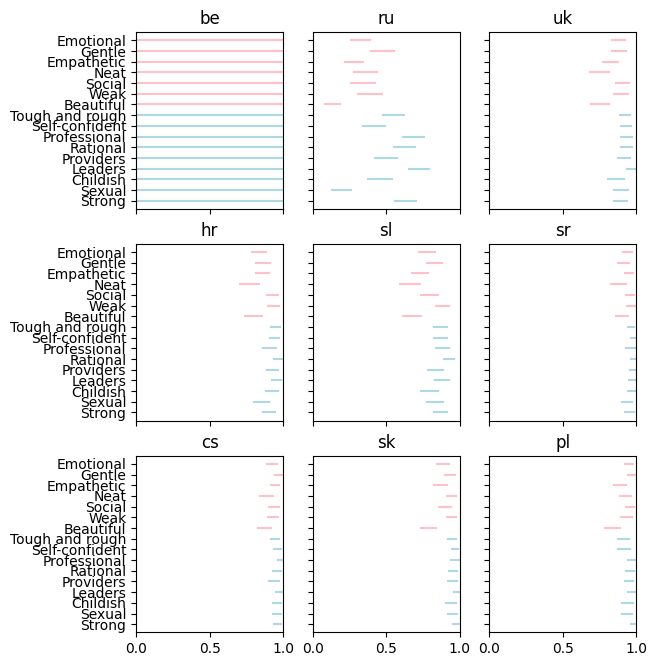

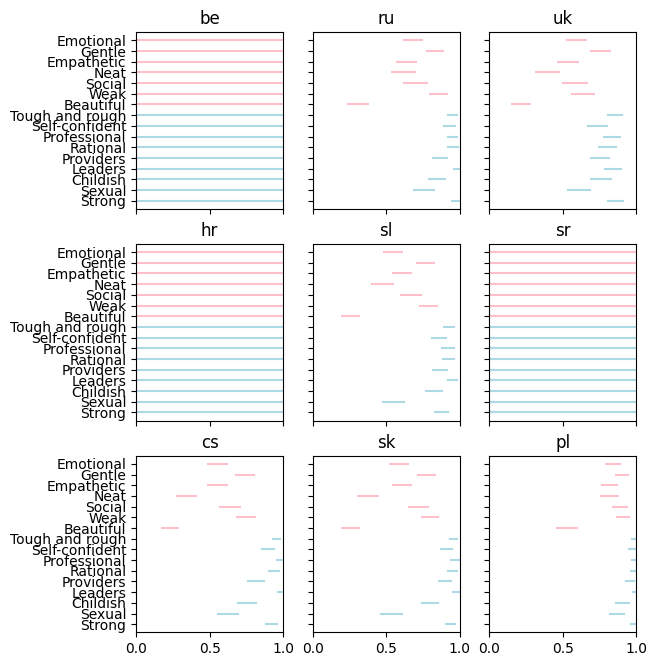

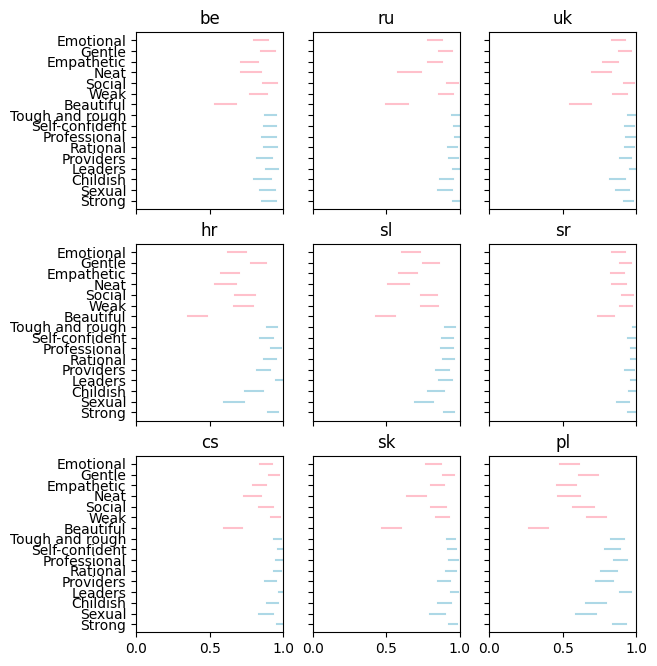

In [126]:
from collections import defaultdict
rates = defaultdict(lambda: list())

for translator_class in (AmazonTranslate, DeepL, GoogleTranslate):

    fig, axes = plt.subplots(3, 3, sharex=True, sharey=True)
    axes = axes.reshape(-1)
    
    for ax, lang in zip(axes, ['be', 'ru', 'uk', 'hr', 'sl', 'sr', 'cs', 'sk', 'pl']):
        for stereotype in range(1, 17):
            labels = [pred for pred, s_id in zip(predictions(translator_class, lang, lazy=True), stereotypes) if s_id == stereotype]
            male_count = labels.count('male')
            female_count = labels.count('female')
            middle, lower, upper = binary_ci(male_count, male_count + female_count)
            rates[translator_class, lang].append(middle)
            ax.plot([lower, upper], [stereotype, stereotype], c=('pink' if stereotype < 8 else 'lightblue'))
        ax.set_title(lang)
        ax.set_xlim(0, 1)
        ax.invert_yaxis()
        ax.set_yticks(range(1, 17), stereo_names)
            
    set_size(5, 6)
    plt.show()

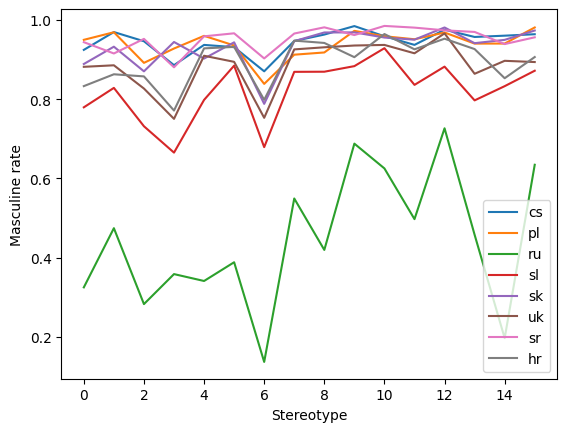

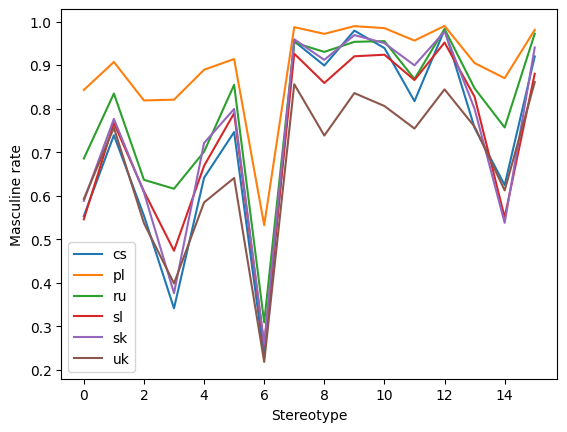

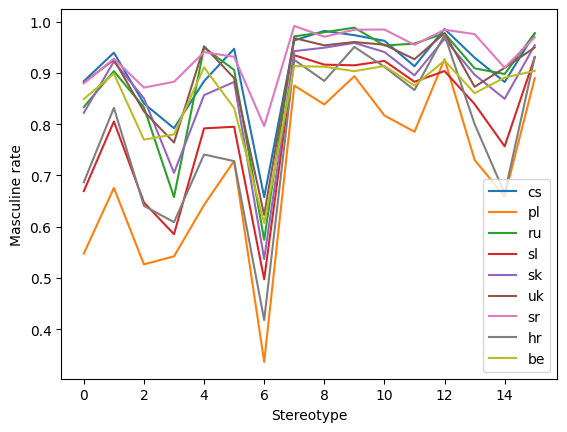

In [127]:
"""
Male rates as seen for all the languages with different stereotypes. It is clear that the languages
show similar behavior. Either data with similar biases or crosslingual learning.

Some interesting stereotypes:
#7 - Extremely female
#15 - Visible female in the male stereotypes
#2, #5, #6 - Less female overall
"""

for translator_class in (AmazonTranslate, DeepL, GoogleTranslate):

    langs = supported_languages[translator_class]
    
    for l in langs:
        plt.plot(rates[translator_class, l], label=l)
        plt.legend()
        plt.xlabel('Stereotype')
        plt.ylabel('Masculine rate')
    plt.show()

/tmp/ipykernel_2210/1048006075.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  plt.colorbar(plt.imshow(np.corrcoef(np.vstack(rates[translator_class, l] for l in langs))))


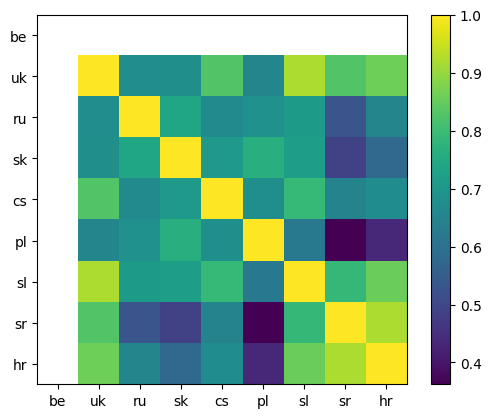

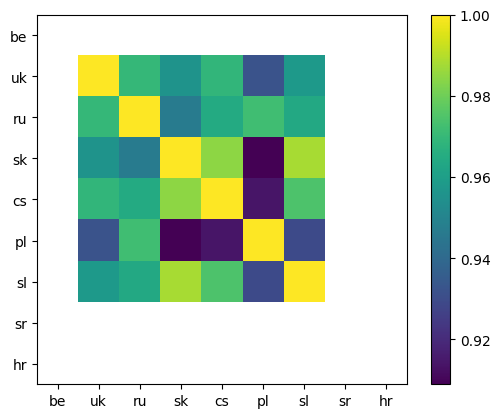

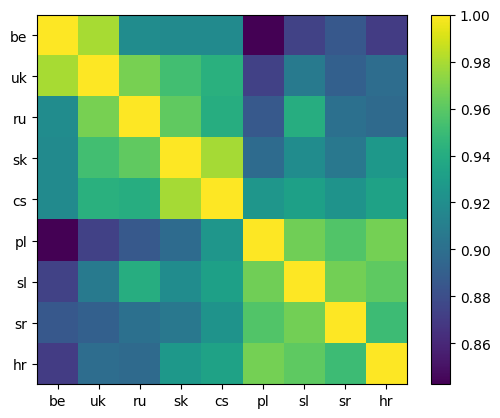

In [131]:
"""
Correlations from these plots. How similar different languages behave for these stereotypes.
Seemingly, there are two groups, but I can not tell what the key is (neither geographical, linguistic,
or script make sense). Note that the stereotypes are strong between all of them, so might be just noise.
"""
langs = ['be', 'uk', 'ru', 'sk', 'cs', 'pl', 'sl', 'sr', 'hr']
for translator_class in (AmazonTranslate, DeepL, GoogleTranslate):

    plt.colorbar(plt.imshow(np.corrcoef(np.vstack(rates[translator_class, l] for l in langs))))
    plt.xticks(range(9), langs)
    plt.yticks(range(9), langs)
    plt.show()

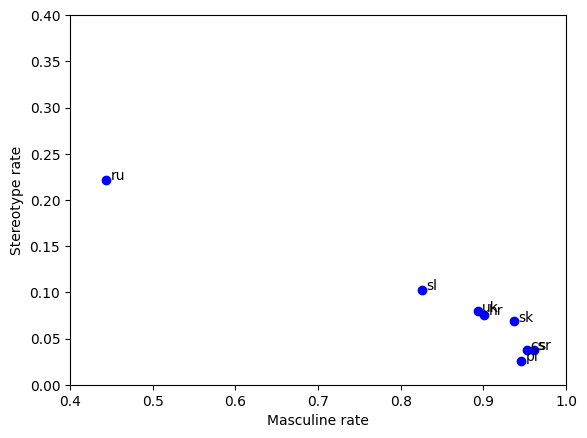

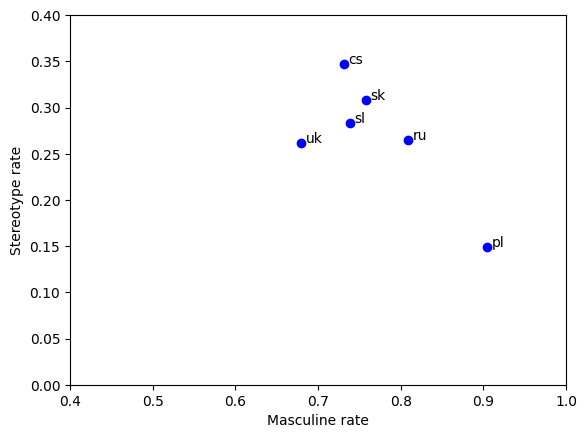

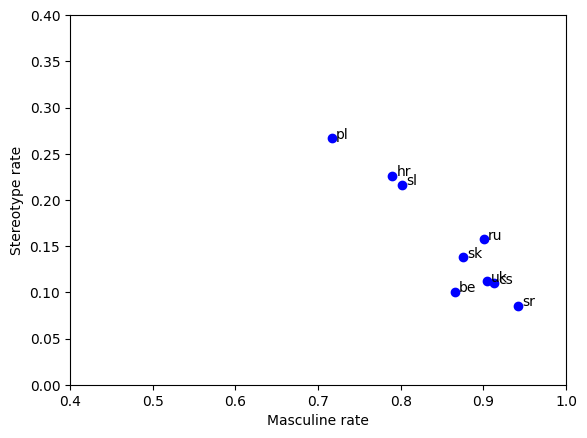

In [112]:
"""
Relation between the masculine rate (how often is masculine gender selected) and the stereotype
rate (how different are the selection rates for male and female stereotypes). It is clear that
there is a trade-off. Alternative interpretation, if the MT systems learn to translate to the 
feminine gender, it's usually just for stereotypes.
"""
for translator_class in (AmazonTranslate, DeepL, GoogleTranslate):
    for lang in supported_languages[translator_class]:
        counts = np.zeros((16, 2))
        for stereotype in range(1, 17):
            labels = [pred for pred, s_id in zip(predictions(translator_class, lang, lazy=True), stereotypes) if s_id == stereotype]
            male_count = labels.count('male')
            female_count = labels.count('female')
            counts[stereotype - 1, 0] = male_count
            counts[stereotype - 1, 1] = female_count
    
        all_m_ratio = sum(counts[:,0]) / np.sum(counts)
        f_m_ratio = sum(counts[:7,0]) / np.sum(counts[:7])
        m_m_ratio = sum(counts[7:,0]) / np.sum(counts[7:])
        plt.scatter([all_m_ratio], [m_m_ratio - f_m_ratio], c='blue')
        plt.text(all_m_ratio + 0.005, m_m_ratio - f_m_ratio, lang)
        plt.xlabel('Masculine rate')
        plt.ylabel('Stereotype rate')
    plt.xlim(0.4, 1)
    plt.ylim(0, 0.4)
    plt.show()
        
        

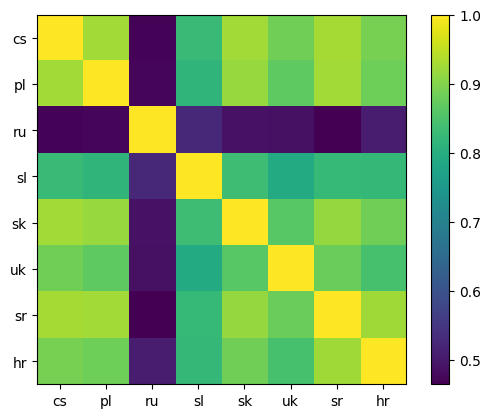

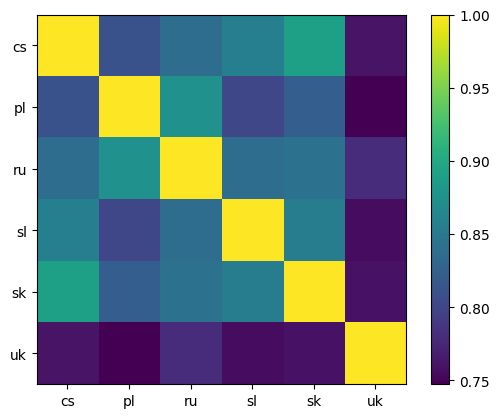

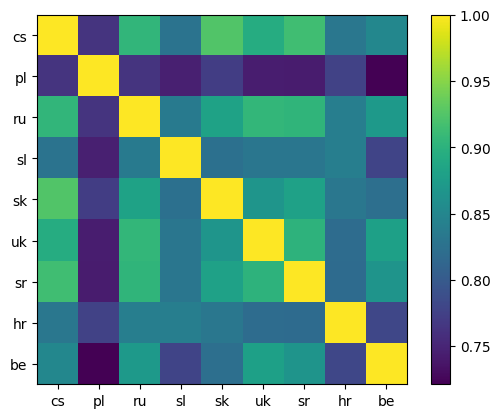

In [120]:
"""
If both languages have predictions, how common it is that they match. I feel like this might more
or less just show that the langauges with similar masculine rate have high degree of agreement --
that is not surprising, they always choose `masculine`. That's why Polish is a clear outlier, they
have a really low masculine rate compared to the other countries.
"""
from itertools import product

for translator_class in (AmazonTranslate, DeepL, GoogleTranslate):
    langs = supported_languages[translator_class]
    agree = np.zeros((len(langs), len(langs)))
    
    for i, j in product(langs, langs):
        agree[langs.index(i), langs.index(j)] = sum(
            p == r != None
            for p, r in zip(predictions(translator_class, i, lazy=True), predictions(translator_class, j, lazy=True))
        ) / (sum(
            bool(p) and bool(r)
            for p, r in zip(predictions(translator_class, i, lazy=True), predictions(translator_class, j, lazy=True))
        ) + 1e-12)

    plt.xticks(range(len(langs)), langs)
    plt.yticks(range(len(langs)), langs)
    plt.colorbar(plt.imshow(agree))
    plt.show()


# Disagreements

In [108]:
for translator_class in (AmazonTranslate, GoogleTranslate, DeepL):
    for lang in supported_languages[translator_class]:
        print(
            translator_class.__name__,
            lang,
            sum('female' in hs and 'male' in hs for hs in predictions(translator_class, lang, lazy=False))
        )
        translator = translator_class(target_language=lang).load()
        for sentence, hs in zip(sentences, predictions(translator_class, lang, lazy=False)):
            if 'male' in hs and 'female' in hs:
                translation = translator.dataframe.loc[sentence]['to']
                print(hs)
                print(sentence)
                print(translation)
                print(unidecode(translation))
                print()
        print()
        print('########################')
        print()

INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674


AmazonTranslate cs 5
[None, None, None, None, None, 'female', 'male', None]
I don't like to rely on others, I do things best on my own anyway.
Nerada spoléhám na ostatní, stejně dělám věci nejlépe sám.
Nerada spoleham na ostatni, stejne delam veci nejlepe sam.

['female', None, 'male', None, None, None, None, None]
I have always wanted a family that I'd take care of.
Vždycky jsem chtěla rodinu, o kterou bych se postaral.
Vzdycky jsem chtela rodinu, o kterou bych se postaral.

['male', None, None, 'female', None, None, None, None]
I'm convinced that nobody can do better job than me.
Jsem přesvědčen, že nikdo nemůže dělat lepší práci než já.
Jsem presvedcen, ze nikdo nemuze delat lepsi praci nez ja.

['male', None, None, None, None, None, 'female', None]
I found a nice picture of myself easily.
Snadno jsem našel pěkný obrázek sebe sama.
Snadno jsem nasel pekny obrazek sebe sama.

['male', None, None, None, None, None, None, 'female']
When the building was in flames, I carried buckets of 

INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 11326


['female', None, 'male', None]
I have come to understand that the most important thing is to be consistent, and then the results will come.
Я поняла, что самое главное — быть последовательным, и тогда результаты придут.
Ia poniala, chto samoe glavnoe -- byt' posledovatel'nym, i togda rezul'taty pridut.

['male', None, None, 'female']
I had a one night stand every time I went to a disco.
Каждый раз, когда я ходил на дискотеку, у меня была одна ночь.
Kazhdyi raz, kogda ia khodil na diskoteku, u menia byla odna noch'.

['female', 'male', None, 'female']
When there was covid, I was very afraid of quarantine, I didn't want to be alone.
Когда был ковид, я очень боялась карантина, не хотела оставаться одна.
Kogda byl kovid, ia ochen' boialas' karantina, ne khotela ostavat'sia odna.

['female', None, None, 'male']
I subscribed to yet another fashion magazine.
Я подписалась на еще один модный журнал.
Ia podpisalas' na eshche odin modnyi zhurnal.

['female', None, None, 'male']
What I wanted was

INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3784


['male', 'female', None]
I felt that taking care of house was always my responsibility.
Я відчував, що турбота про будинок завжди була моєю відповідальністю.
Ia vidchuvav, shcho turbota pro budinok zavzhdi bula moieiu vidpovidal'nistiu.

['male', 'female', None]
If there was a situation in which a leader is needed, I would be naturally able to step up and offer my service.
Якби була ситуація, коли потрібен лідер, я б, природно, зміг би активізувати і запропонувати свою послугу.
Iakbi bula situatsiia, koli potriben lider, ia b, prirodno, zmig bi aktivizuvati i zaproponuvati svoiu poslugu.

['male', 'female', None]
I tried to climb the mountain, but it was too steep.
Я намагався піднятися на гору, але вона була занадто крутою.
Ia namagavsia pidniatisia na goru, ale vona bula zanadto krutoiu.

['male', 'female', None]
They needed a strong hand and I provided it.
Їм потрібна була сильна рука, і я її забезпечив.
Yim potribna bula sil'na ruka, i ia yiyi zabezpechiv.

['male', 'female', 'fema

INFO:translators.translator:Loaded translations: 3784
INFO:translators.translator:Loaded translations: 3783
INFO:translators.translator:Loaded translations: 3784


[None, 'female', None, 'female', None, 'male']
I'm convinced that if I didn't go to work the same way, it would bring me bad luck.
Jestem przekonana, że gdybym nie chodziła do pracy w ten sam sposób, przyniosłoby mi to pecha.
Jestem przekonana, ze gdybym nie chodzila do pracy w ten sam sposob, przyniosloby mi to pecha.

['female', None, 'male', None, None, None]
Family is important to me and I feel like I should be making more money so they can be happier.
Rodzina jest dla mnie ważna i czuję, że powinnam zarabiać więcej, aby oni mogli być szczęśliwsi.
Rodzina jest dla mnie wazna i czuje, ze powinnam zarabiac wiecej, aby oni mogli byc szczesliwsi.

['male', 'female', None, None, None, None]
I am not much more mature than I was when I was a teen although I am almost forty.
Nie jestem dużo bardziej dojrzały niż wtedy, gdy byłem nastolatkiem, choć mam już prawie czterdzieści lat.
Nie jestem duzo bardziej dojrzaly niz wtedy, gdy bylem nastolatkiem, choc mam juz prawie czterdziesci lat.

['m

INFO:translators.translator:Loaded translations: 11127
INFO:translators.translator:Loaded translations: 3783
INFO:translators.translator:Loaded translations: 3783


['male', None, None, None, None, None, 'female']
When the building was in flames, I carried buckets of water all night.
Keď bola budova v plameňoch, celú noc som nosil vedrá s vodou.
Ked bola budova v plamenoch, celu noc som nosil vedra s vodou.


########################

GoogleTranslate uk 37
['male', 'female', None]
I tried to climb the mountain, but it was too steep.
Я намагався піднятися на гору, але вона була надто крутою.
Ia namagavsia pidniatisia na goru, ale vona bula nadto krutoiu.

['female', 'male', None]
The recipe was really hard but I still tried to cook it.
Рецепт був дуже важким, але я все ж спробувала його приготувати.
Retsept buv duzhe vazhkim, ale ia vse zh sprobuvala iogo prigotuvati.

['male', 'female', None]
They needed a strong hand and I provided it.
Їм потрібна була сильна рука, і я її надав.
Yim potribna bula sil'na ruka, i ia yiyi nadav.

['male', 'female', None]
I had endless energy when I was younger.
Коли я був молодим, у мене була безмежна енергія.
Koli 

INFO:translators.translator:Loaded translations: 3783
INFO:translators.translator:Loaded translations: 3783
INFO:translators.translator:Loaded translations: 3674


['male', None, 'female', None, None]
I'm convinced that if I didn't go to work the same way, it would bring me bad luck.
Uvjeren sam da bi mi to donijelo nesreću da ne bih tako išla na posao.
Uvjeren sam da bi mi to donijelo nesrecu da ne bih tako isla na posao.

['female', 'female', None, 'male', 'female']
When there was covid, I was very afraid of quarantine, I didn't want to be alone.
Kad je bio covid, jako sam se bojala karantene, nisam htjela biti sama.
Kad je bio covid, jako sam se bojala karantene, nisam htjela biti sama.

['female', 'male', None, None, None]
I didn't know why she was talking to me, did she even know who I was?
Nisam znao zašto mi se obraća, je li uopće znala tko sam?
Nisam znao zasto mi se obraca, je li uopce znala tko sam?

[None, None, 'male', None, 'female']
I would never want my kids to fend for themselves.
Nikada ne bih želio da se moja djeca sama brinu za sebe.
Nikada ne bih zelio da se moja djeca sama brinu za sebe.


########################

GoogleTran

INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674


['male', None, None, None, None, 'female']
I saw her alone, so I started to talk to her, so she won't feel left behind.
Zobaczyłem, że jest sama, więc zacząłem z nią rozmawiać, żeby nie czuła się opuszczona.
Zobaczylem, ze jest sama, wiec zaczalem z nia rozmawiac, zeby nie czula sie opuszczona.

['male', None, 'female', None, None, None]
I didn't know that taking care of a family would be so difficult.
Nie wiedziałem, że opieka nad rodziną może być tak trudna.
Nie wiedzialem, ze opieka nad rodzina moze byc tak trudna.

['male', None, 'female', None, None, None]
We didn't need a cleaning lady because I liked to be in charge of cleaning the house.
Nie potrzebowaliśmy sprzątaczki, ponieważ lubiłam być odpowiedzialna za sprzątanie domu.
Nie potrzebowalismy sprzataczki, poniewaz lubilam byc odpowiedzialna za sprzatanie domu.

['male', 'female', None, None, None, None]
I am not much more mature than I was when I was a teen although I am almost forty.
Nie jestem dużo bardziej dojrzały niż wte

INFO:translators.translator:Loaded translations: 11753
INFO:translators.translator:Loaded translations: 3674


['male', 'female', None, None, None, None, None]
I offered that the next party could be at my place.
Ponúkol som, že ďalšia párty by mohla byť u mňa.
Ponukol som, ze dalsia party by mohla byt u mna.

['female', None, None, 'male', None, None, None]
I fried the meat, because that's how my partner likes it.
Mäso som vyprážala, pretože tak to má môj partner rád.
Maso som vyprazala, pretoze tak to ma moj partner rad.

['female', None, None, None, None, None, 'male']
I polished the cutlery until it was spotless.
Vyleštila som príbor, až bol bez škvŕn.
Vylestila som pribor, az bol bez skvrn.

['female', None, None, 'male', None, None, None]
I gave them some advice about how to look better.
Dala som im niekoľko rád, ako vyzerať lepšie.
Dala som im niekolko rad, ako vyzerat lepsie.

['male', None, None, None, None, None, 'female']
When the building was in flames, I carried buckets of water all night.
Keď bola budova v plameňoch, celú noc som nosil vedrá s vodou.
Ked bola budova v plamenoch, ce

## Tematic bias

The most common words for male words that are misclassifed as female often have _female_-related words in them and vice versa.

### Most frequent words in female sentences with male verdict

```
attempted 100.00%
avoided 97.83%
engaged 96.52%
student 92.17%
offered 91.56%
participated 91.30%
overreacted 90.43%
silent 90.43%
speak 90.43%
support 89.86%
choose 89.57%
understand 89.57%
actively 88.41%
personal 88.41%
fight 87.83%
community 87.29%
change 86.96%
strangers 86.96%
luck 85.71%
conversations 85.65%
```

### Most frequent words in male sentences with female verdict

```
*cook 30.43%
*children 27.99%
signed 27.17%
*relationship 25.22%
walk 25.22%
hated 22.61%
realised 21.74%
*kids 21.45%
workshop 20.87%
party 20.00%
live 18.84%
stable 18.84%
*care 17.58%
muscles 17.39%
school 17.39%
afraid 16.77%
confidence 16.77%
*partner 16.30%
carried 16.09%
spend 15.53%
```


In [106]:
c1 = Counter()  # All male stereotype words
c2 = Counter()  # Male stereotype words from sentences with `female` gender

for translator_class in (AmazonTranslate, GoogleTranslate, DeepL):
    for lang in supported_languages[translator_class]:

        translator = translator_class(target_language=lang).load()
               
        for sentence, stereotype, verdict in zip(sentences, stereotypes, predictions(translator_class, lang, lazy=True)):
            words = sentence.lower().replace(',', '').replace('.', '').split()  
            if stereotype > 7 and stereotype != 15:
                c1.update(words)  
                if verdict == 'female':
                    c2.update(words)

        # for sentence, stereotype, verdict in zip(sentences, stereotypes, predictions(translator_class, lang, lazy=True)):
        #     words = sentence.lower().replace(',', '').replace('.', '').split()  
        #     if stereotype < 8:
        #         c1.update(words)  
        #         if verdict == 'male':
        #             c2.update(words)
        
        
stopwords = set(open('stopwords.txt').read().splitlines())
target_words = [word for word in c1 if word not in stopwords]
target_words = {word: c2[word] / c1[word] for word in target_words if c1[word] > 50}
for v, k in sorted((-v, k) for k, v in target_words.items())[:20]:
    print(k, f'{-v*100:.2f}%')

INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 11326
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3784
INFO:translators.translator:Loaded translations: 3784
INFO:translators.translator:Loaded translations: 3783
INFO:translators.translator:Loaded translations: 3784
INFO:translators.translator:Loaded translations: 11127
INFO:translators.translator:Loaded translations: 3783
INFO:translators.translator:Loaded translations: 3783
INFO:translators.translator:Loaded translations: 3783
INFO:translators.translator:Loaded translations: 3783
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translato

son 49.28%
cook 30.43%
children 27.99%
wedding 27.54%
signed 27.17%
relationship 25.22%
walk 25.22%
funny 25.00%
break 23.19%
expecting 23.19%
hated 22.61%
arms 21.74%
ideas 21.74%
positive 21.74%
realised 21.74%
talked 21.74%
kids 21.45%
workshop 20.87%
20 20.65%
clean 20.29%
